## Background / Motivation

All four of us are current college students that will soon be entering the professional world. Many of us are planning to pursue careers in various STEM fields such as software development or data science. With this in mind, we wanted to create a model that can help to predict the salaries of the people that work in these fields. Through this project, we wanted to develop a model that we could one day use to predict what our salaries should be. 

## Problem statement 

Through this project, we will attempt to predict the salaries for employees that work in STEM fields. As we are predicting salaries, the response observed in this project is a continuous variable—their annunal salary in USD. We will assess our model accuracy using MAE. We have selected this metric instead of RMSE as there is no inherit risk or disadvantage in incorrectly predicting observations by a large margin.

## Data sources

We will be using a data source comprised of salary data for employees in STEM fields. This dataset was found on Kaggle and contains data scraped from a salary collecting website (levels.fyi). The data can be found [here](https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries). 

The response in this problem is `totalyearlycompensation`. Some of the predictors include `company`, `title`, `yearsofexperience`, `yearsatcompany`, `location`, `Education`, `Race`, and `Gender`.

There are ~21,000 observations in our dataset. There are 10 total predictors comprised of 2 continuous and 8 categorical predictors.

## Stakeholders

The dataset our group has chosen to analyze investigates the compensation for various STEM roles at companies. Many groups of people could benefit from this analysis. Firstly, students pursuing a career in STEM would definitely be interested in this data. Although compensation does not drive most student's professional path, it certainly is a factor that holds weight. Secondly, colleges and universities would benefit from our group's analysis. By understanding which roles are in the highest demand in our society, they may place more emphasis on prioritizing resources and professors in those academic areas. Thirdly, employees would be interested in our findings to ensure that their compensation is fair relative to industry standards, giving them the opportunity to negotiate for higher pay. Fourthly, in the same way our analysis could benefit employees, employers would benefit as they could see how their compensation packages compare to their competitor's compensation packages allowing them to understand better how they are attracting talent in these fields and how to make the open positions more attractive to prospective employees. 

## Data quality check / cleaning / preparation 

Show the distribution of the response here. Report the standard deviation and mean in case of a regression problem, and proportion of 0s and 1s in case of classification.

For all other content, as mentioned below, just provide the highlights *(if any)* and put the details in the appendix.

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation. Its ok if there were none.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? Were there missing values? How did you handle them? Its ok if the data was already clean.

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your model(s).

## Exploratory data analysis

If there is any EDA that helped with model development, put it here. If EDA didn't help then mention that, and you may show your EDA effort *(if any)* in the appendix.

List the insights (as bullet points), if any, you got from EDA  that ended up being useful towards developing your final model. 

If there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

Note that you can write code to publish the results of the code, but hide the code using the yaml setting `#|echo: false`. For example, the code below makes a plot, but the code itself is not published with Quarto in the report.

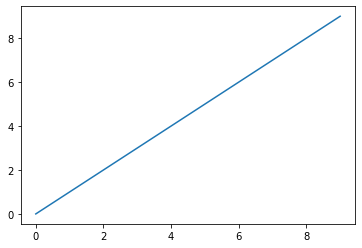

In [4]:
#| echo: false
import matplotlib.pyplot as plt
plt.plot(range(10));

## Approach

What kind of a models did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction accuracy or your chosen metric?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### Lasso & Ridge
*By Charlie Lovett*

### Random Forest
*By Lainey Neild*

### AdaBoost
*By Jacob Muriel*

### Gradient Boosting & XGBoost
*By Jack Troxel*

I used extremely similar processes to tune both Gradient Boosting and XGBoost. For both, I started with an extremely coarse gridsearch using RandomizedSearchCV based on the results of an exploration into each hyperparameter value versus the corresponding cross validation MAE. After that, I conducted I finer search using GridSearchCV. I continued to narrow in on finer and finer parameters until I found that the optimal parameters from these searches were actually increasing MAE on test data (due to overfitting). The searches that I conducted and the results that I achieved are seen below. As seen, I did not include n_estimators in any of my searches. Instead, I tuned n_estimators individually after deciding upon the other optimal hyperparameters.

Initial Gradient Boosting Search (RandomizedSearchCV):
- grid['learning_rate'] = [0.0001, 0.001, 0.01,0.1, 1.0]
- grid['max_depth'] = [5,6,7,8,9,10,11,12]
- grid['subsample'] = [0.25, 0.5, 0.75, 1]

Gradient Boosting Optimal Hyperparameters (after multiple rounds of finer tuning): 
- learning_rate = 0.1
- subsample = 0.75
- max_depth = 6
- n_estimators = 450

*Gradient Boosting MAE on Test Data: 47,579*

Initial XGBoost Search (RandomizedSearchCV):
- grid['max_depth'] = [3,4,5,6,7,8],
- grid['learning_rate'] = [0.1,0.2,0.3],
- grid['reg_lambda'] = [2, 10],
- grid['gamma'] = [0, 10],
- grid['subsample'] = [0.25,0.5,0.75,1]

XGBoost Optimal Hyperparameters (after multiple rounds of finer tuning):
- max_depth = 6
- learning_rate = 0.08
- reg_lambda = 10
- gamma = 0
- subsample = 0.75
- n_estimators = 450

*XGBoost MAE on Test Data: 47,440*

## Model Ensemble 

Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble

The simplest voting ensemble will be the model where all models have equal weights.

You may come up with innovative methods of estimating weights of the individual models, such as based on their cross-val error. Sometimes, these methods may work better than stacking ensembles, as stacking ensembles tend to overfit.

### Stacking ensemble
Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

### Ensemble of ensembled models

If you are creating multiple stacking ensembles *(based on different metamodels)*, you may ensemble them.

### Innovative ensembling methods
*(Optional)*

Some models may do better on certain subsets of the predictor space. You may find that out, and given a data point, choose the model(s) that will best predict for that data point. This is similar to the idea of developing a decision tree metamodel. However, decision tree is prone to overfitting.

Another idea may be to correct the individual models with the intercept and slope *(note the tree-based models don't have an intercept and may suffer from a constant bias)*, and then ensemble them. This is equivalent to having a simple linear regression meta-model for each of the individual models, and then ensembling the meta-models with a meta-metamodel or a voting ensemble.

## Limitations of the model with regard to prediction

Are you confident that you found the optimal hyperparameter values for each of your individual models, and that your individual models cannot be better tuned? Or, are there any models that could be better tuned if you had more time / resources, but you are limited by the amount of time you can spend on the course project *(equivalent to one assignment)*? If yes, then which models could be better tuned and how?

Will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

We are fairly confident in our chosen hyperparameters. While we did have a large dataset with a large amount of dummy variables, we still were able to perform effective grid searches to gauge the hyperparameter space with regards to our model's accuracy. That said, we obviously did not check every single combination of hyperparameters so it is definitely possible that there are better selections, and given some more time and computational power we likely could have achieved marginally better results. Additionally, it should not be too difficult for the stakeholders to collect relevant data relating to the predictors in the model. Individual students and employees should be aware of their own identities and the characteristics of their jobs (or prospective jobs) which is all they would need to use the model, and employers should have all the same information on their own employees to be used in the same way. It might be a bit more difficult for universities to track where their students typically work after studying or where their current students are likely to go, though they probably do have some of the relevant information on hand. The model may become obsolete by the year, in which case it could simply be updated by being trained on a new dataset with updated salaries and other relevant information. Once it's updated, stakeholders should be able to use it right away to decide how to proceed with their future, though they may need to be aware that 

## Conclusions and Recommendations to stakeholder(s)

Based on the results of our model, we are beyond satisfied in our ability to predict salaries for employees in STEM fields. Our model's MAE is significantly lower than that of the intercept only model and is also significanly lower than the initial standard deviation of the response variable, and both of those indicate that our model is performing significanly better than merely predicting the mean. Additionally, our stakeholders should be able to use our model to help in the following ways. Students pursuing a career in STEM can look at their own identities and weigh those with other potential aspects (company, what title they would have, etc.) to help them decide where they might want to work. Universities are likely aware of where their students typically go after studying, and they can use this information in tendem with our model to help them decide how to allocate their resources in a way that would set their students up for the most success (financially, at least). Employees can also look at their own identities and other aspects of their job to gauge whether they are being fairly compensated, and can use this information to decide whether they want to fight for a higher compensation of even try to go to another company. Lastly, employers can use the model in a similar way to see whether they are paying their employees too much, and can use it as a reasonable basis for denying some people higher compensations. That said, the stakeholders should probably be aware of a limitation that has to do with our model. Because of the large variety of results within the categorical predictors, we had to group and convert some variable names to "other" so reduce the computational complexity of our model, and thus not all companies, locations, and titles are distinctly addressed in this model. Additionally, our model should likely be updated every year (with a new dataset containing data from salaries and demographics from the most recent year) to account for overarching shifts in the industry's salaries.

Add details of each team member's contribution, other than the models contributed, in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Charlie Lovett</td>
    <td>Lasso & Ridge</td>
    <td>Data cleaning and Model Ensembling</td>    
    <td>Helped to limit count of categorical observations. Led the development of ensembeled models.</td>
  </tr>
  <tr>
    <td>Jacob Muriel</td>
    <td>AdaBoost</td>
    <td>Ensembling</td>    
    <td>Led original data cleaning and assisted Charlie with ensembling.</td>
  </tr>
    <tr>
    <td>Lainey Neild</td>
    <td>Random forest</td>
    <td>EDA and Data Preparation</td>    
    <td>Conducted initial EDA and assisted in data preparation process.</td>
  </tr>
    <tr>
    <td>Jack Troxel</td>
    <td>XGBoost & Gradient Boosting</td>
    <td>EDA and Presentation</td>    
    <td>Helped with initial EDA and created presentation for final project.</td> 
  </tr>
</table>

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3
